# Machine Learning

*Лектор: Екатерина Лобачева*

*Факультет экономических наук НИУ ВШЭ, 2017-18 учебный год*

[Страница курса](http://wiki.cs.hse.ru/Машинное_обучение_(факультет_экономических_наук%29)

## Домашнее задание №1
Задание основано на материалах курса [Data analysis (Software Engineering)](http://wiki.cs.hse.ru/Data_analysis_(Software_Engineering%29) (ФКН НИУ ВШЭ).

Вам необходимо анализировать набор данных [adult.data](http://archive.ics.uci.edu/ml/datasets/Adult) (источник: UCI Machine Learning Repository) с помощью Python, pandas, numpy, scipy.

Чтобы выполнить работу, скачайте настоящий ipynb-файл, откройте его в *Jupyter Notebook*, впишите решения в оставленные для этого ячейки (при необходимости можно добавлять новые ячейки), приводя полный работающий код, а также все необходимые пояснения и ответы (для этого нужно использовать markdown-ячейки). Вы можете вставлять формулы с помощью TeX-разметки в markdown-ячейки. После выполнения работы необходимо вытащить ipynb-файл из Jupyter (например, с помощью *File → Download as… → IPython Notebook*).

**Подсказка.** Файл [adult.data](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data) является CSV-файлом, но в нём отсутствуют имена переменных — они (вместе с описаниями) приводятся в отдельном файле [adult.names](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). При загрузке датафрейма с помощью `pd.read_csv` используйте параметры `header=None` (чтобы первая строка не воспринималась как строка с именами переменных) и `names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"]`. Чтобы убрать лишние пробелы после запятых, которые есть в файле, следует добавить опцию `skipinitialspace=True`.

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import matplotlib as plt
%matplotlib inline 

In [7]:
df = pd.read_csv('adult_data.csv', header=None, names=["age", "workclass", "fnlwgt", "education", "education-num", 
 "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week",
 "native-country", "50K"], skipinitialspace=True,na_values="?")

Посмотрим на данные:

In [8]:
print(df.shape)
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Вопрос 1
Сколько мужчин и женщин в выборке?

пропусков и ошибок в признаке нет:

In [10]:
df['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [11]:
groups = df['sex'].value_counts().index.tolist()
values = df['sex'].value_counts().tolist()
for i in range(len(groups)):
    print('number of %s is %d'%(groups[i],values[i]))

number of Male is 21790
number of Female is 10771


### Вопрос 2
Каков средний возраст мужчин?


проблем нет, тк пропусков в возрасте нет:

In [12]:
df['age'].isnull().unique()

array([False], dtype=bool)

In [13]:
print('Средний возраст мужчин:',df[df['sex']=='Male']['age'].mean(),' лет')

Средний возраст мужчин: 39.43354749885268  лет


### Вопрос 3
Какова доля граждан США?

в признаке присутствуют пропуски:

In [14]:
df['native-country'].isnull().unique()

array([False,  True], dtype=bool)

учтем пропуски:

In [18]:
df['native-country'].count()

31978

In [17]:
print('Доля граждан США: ', df[df['native-country']=='United-States']['native-country'].count()/df['native-country'].count())

Доля граждан США:  0.912189630371


### Вопрос 4
Нарисовать распределение уровня образования в виде столбчатой диаграммы (bar plot).

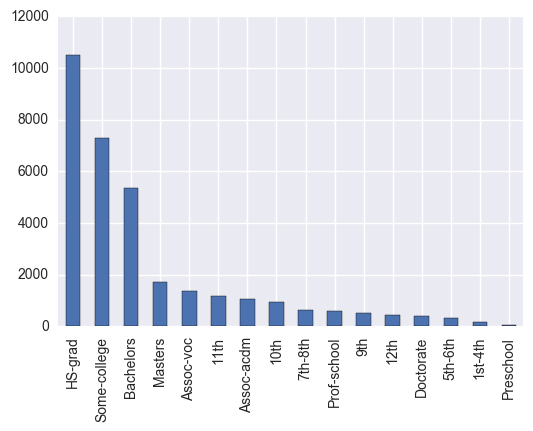

In [19]:
df['education'].value_counts().plot(kind='bar')

### Вопрос 5
Найти среднее и стандартное отклонение переменной "final weight" (fnlwgt) для разведённых людей?

mean, std учитывают пропуски:

In [20]:
print('Среднее равно: ', df[df['marital-status']=='Divorced']['fnlwgt'].mean())
print('Стандартное отклонение равно: ', np.std(df[df['marital-status']=='Divorced']['fnlwgt']))

Среднее равно:  185802.79045689848
Стандартное отклонение равно:  105634.89966249917


### Вопрос 6
Правда ли, что люди, зарабатывающие более 50 тыс. в основном имеют высшее образование?
- пропусков нет:

In [21]:
df['education'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

[информация по датасету](https://artax.karlin.mff.cuni.cz/r-help/library/arules/html/Adult.html) 
- education: an ordered factor with levels Preschool < 1st-4th < 5th-6th < 7th-8th < 9th < 10th < 11th < 12th < HS-grad < Prof-school < Assoc-acdm < Assoc-voc < Some-college < Bachelors < Masters < Doctorate.
- Следующие группы имеют высшее образование: Bachelors, Masters, Doctorate

In [22]:
df[df['50K']=='>50K']['education'].value_counts()

Bachelors       2221
HS-grad         1675
Some-college    1387
Masters          959
Prof-school      423
Assoc-voc        361
Doctorate        306
Assoc-acdm       265
10th              62
11th              60
7th-8th           40
12th              33
9th               27
5th-6th           16
1st-4th            6
Name: education, dtype: int64

In [25]:
high=len(df[(df['50K']=='>50K') & ((df['education']=='Bachelors')|(df['education']=='Masters')|(df['education']=='Doctorate'))])
num = len(df[df['50K']=='>50K'])
print('Доля людей с высшим образованием и зп >50K: ',high/num)

Доля людей с высшим образованием и зп >50K:  0.4445861497258003


**Вывод**: меньше половины людей с зп больше 50 тыс. имеют высшее образование, следовательно, утверждение неверно

### Вопрос 7
Каков максимальный возраст мужчин и женщин каждой расы?

ответ представим в виде таблички с помощью группировки по полу и расе, применив аггрегирующую функцию максимума к возрасту:

In [26]:
df.groupby(['sex','race'])['age'].max()

sex     race              
Female  Amer-Indian-Eskimo    80
        Asian-Pac-Islander    75
        Black                 90
        Other                 74
        White                 90
Male    Amer-Indian-Eskimo    82
        Asian-Pac-Islander    90
        Black                 90
        Other                 77
        White                 90
Name: age, dtype: int64

### Вопрос 8
Люди из каких стран работают как фермеры/рыбаки?
- ответ записан в виде массива, заметим, что есть группа людей, происхождение которых неизвестно

In [27]:
df[df['occupation']=='Farming-fishing']['native-country'].unique()

array(['United-States', 'Cambodia', 'Poland', 'Guatemala', 'Mexico',
       'England', nan, 'Philippines', 'Italy', 'Puerto-Rico', 'Vietnam',
       'Germany', 'Japan', 'Canada', 'Yugoslavia', 'Cuba', 'Portugal',
       'El-Salvador', 'Hong', 'Ireland', 'France'], dtype=object)

### Вопрос 9
Рассмотрим два отношения 1) количество мужчин-бакалавров к количеству мужчин-магистров и 2) количество женщин-бакалавров к количеству женщин-магистров. Какое отношение больше?


In [28]:
men = len(df[(df['sex']=='Male')&(df['education']=='Bachelors')])/len(df[(df['sex']=='Male')&(df['education']=='Masters')])
wmen = len(df[(df['sex']=='Female')&(df['education']=='Bachelors')])/len(df[(df['sex']=='Female')&(df['education']=='Masters')])                                                                                                                                                

In [29]:
if wmen<men:
    print('отношение 1) больше')
elif wmen>men:
    print('отношение 2) больше')
else:
    print('отношения равны')

отношение 1) больше


### Вопрос 10
Каково максимальное количество рабочих часов в неделю? Как много людей работают столько часов в неделю? Каков их заработок?

In [30]:
hours = max(df['hours-per-week'])
print('максимальное кол-во рабочих часов в неделю: ', hours)

максимальное кол-во рабочих часов в неделю:  99


In [31]:
print('количество людей, которые работают столько часов в неделю: ', len(df[df['hours-per-week']==99]))

количество людей, которые работают столько часов в неделю:  85


In [32]:
df[df['hours-per-week']==99]['50K'].value_counts()

<=50K    60
>50K     25
Name: 50K, dtype: int64

**Вывод**: у 60 человек, которые работают 99 часов в неделю, ежегодный заработок не больше 50 тыс.; у 25 человек, которые работают 99 часов в неделю, ежегодный заработок больше 50 тыс.